In [37]:
df["Componente"].value_counts()

Componente
Tarefa                   6411
Envio de arquivos         793
Envio de texto online     136
Name: count, dtype: int64

In [38]:
df["Nome do evento"].value_counts()

Nome do evento
O status da submissão foi visualizado.    4289
Comentário visualizado                    1514
Um envio foi submetido.                    608
Um arquivo foi enviado.                    542
Submissão criada.                          296
Um texto online foi envidado.               91
Name: count, dtype: int64

# Análise Descritiva dos Dados

## Período de coleta
- coluna `Hora` para tipo `datetime`.
- formato dd/mm/aaaa
- reover horas, minutos, segundos

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7340 entries, 7339 to 3605
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hora                7340 non-null   datetime64[ns]
 1   ID                  7340 non-null   int64         
 2   Contexto do Evento  7340 non-null   object        
 3   Componente          7340 non-null   object        
 4   Nome do evento      7340 non-null   object        
 5   Descrição           7340 non-null   object        
 6   Origem              7340 non-null   object        
 7   endereço IP         7340 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 516.1+ KB


In [40]:
d = df["Hora"].str.split(" ", expand=True)[0] # formato dd/mm/aaaa
d

AttributeError: Can only use .str accessor with string values!

In [41]:
df['Hora'] = pd.to_datetime(d, format="%d/%m/%Y")

In [42]:
type(df['Hora'][42])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
date_range = pd.date_range(start=df['Hora'].min(), end=df['Hora'].max())

In [44]:
print(date_range)

DatetimeIndex(['2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16',
               ...
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
               '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22'],
              dtype='datetime64[ns]', length=200, freq='D')


In [45]:
df = df.sort_values(by=['Hora'])

In [46]:
df.head(-1)

,Hora,ID,Contexto do Evento,Componente,Nome do evento,Descrição,Origem,endereço IP
7339,2023-03-07,25,Tarefa: Tarefa do dia 07/03,Tarefa,O status da submissão foi visualizado.,The user with id '18806' has viewed the submis...,web,10.2.130.150
7331,2023-03-07,25,Tarefa: Tarefa do dia 07/03,Tarefa,O status da submissão foi visualizado.,The user with id '18806' has viewed the submis...,web,2804:ce4:1a2:ce00:e1b8:2af8:313d:ea42
7332,2023-03-07,32,Tarefa: Tarefa do dia 07/03,Tarefa,O status da submissão foi visualizado.,The user with id '18822' has viewed the submis...,web,2804:ce4:166:3d00:c0fa:e5d2:b486:97ce
7333,2023-03-07,32,Tarefa: Tarefa do dia 07/03,Tarefa,Um envio foi submetido.,The user with id '18822' has submitted the sub...,web,2804:ce4:166:3d00:c0fa:e5d2:b486:97ce
7334,2023-03-07,32,Tarefa: Tarefa do dia 07/03,Envio de texto online,Um texto online foi envidado.,The user with id '18822' has saved an online t...,web,2804:ce4:166:3d00:c0fa:e5d2:b486:97ce
...,...,...,...,...,...,...,...,...
3616,2023-09-21,34,Tarefa: Tarefa do dia 15/03,Tarefa,Comentário visualizado,The user with id '18826' viewed the feedback f...,web,2804:ce4:147:8400:cc74:1d76:5554:44e2
3610,2023-09-21,34,Tarefa: Tarefa do dia 15/03,Tarefa,Comentário visualizado,The user with id '18826' viewed the feedback f...,web,168.90.22.93
3607,2023-09-22,34,Tarefa: Tarefa do dia 15/03,Tarefa,O status da submissão foi visualizado.,The user with id '18826' has viewed the submis...,web,200.18.167.252
3606,2023-09-22,34,Tarefa: Tarefa do dia 16/03,Tarefa,Comentário visualizado,The user with id '18826' viewed the feedback f...,web,200.18.167.252


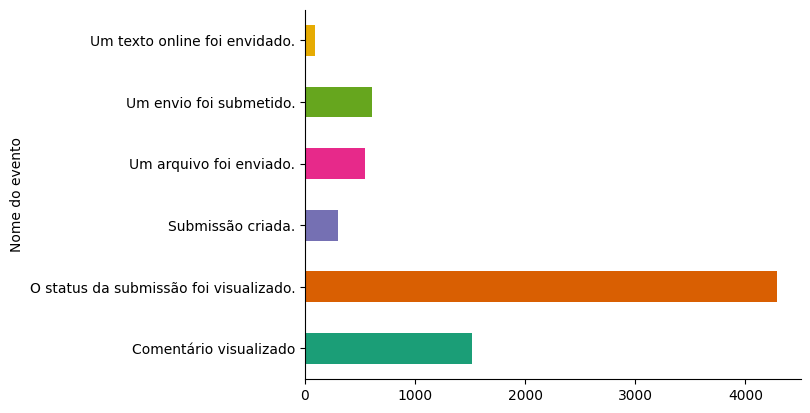

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Nome do evento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Número total de interações

In [49]:
df.info()
#7340 entries

<class 'pandas.core.frame.DataFrame'>
Index: 7340 entries, 7339 to 3605
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hora                7340 non-null   datetime64[ns]
 1   ID                  7340 non-null   int64         
 2   Contexto do Evento  7340 non-null   object        
 3   Componente          7340 non-null   object        
 4   Nome do evento      7340 non-null   object        
 5   Descrição           7340 non-null   object        
 6   Origem              7340 non-null   object        
 7   endereço IP         7340 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 516.1+ KB


In [51]:
df['Hora'].value_counts(ascending=True) # Interações em cada um dos dias em que dados foram coletados

Hora
2023-04-12      1
2023-05-12      1
2023-05-14      1
2023-05-16      1
2023-04-19      2
             ... 
2023-04-03    394
2023-03-31    455
2023-03-13    464
2023-03-22    508
2023-03-24    554
Name: count, Length: 81, dtype: int64

## Quantidade de estudantes

In [52]:
set_id_alunos = set(df['ID'].values)
print(len(set_id_alunos))

40


In [53]:
df['ID'].value_counts(ascending=True).sort_index() # Interações por aluno

ID
1     129
2     173
3      43
4     198
5      59
6     295
7     126
8     171
9     172
10    382
11    107
12    140
13    217
14    127
15    190
16    233
17    405
18      4
19     87
20    233
21    114
22     97
23    161
24    549
25    234
26    129
27    113
28    230
29    122
30    263
31    102
32    226
33    131
34    393
35    332
36     46
37    248
38     48
39    201
40    110
Name: count, dtype: int64

# Preparação dos Dados para Forecasting

In [63]:
## Separação de dataset
column_indices = {name: i for i, name in enumerate(df.columns)}
print(column_indices)
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]


train_df.info()
val_df.info()
test_df.info()

{'Hora': 0, 'ID': 1, 'Contexto do Evento': 2, 'Componente': 3, 'Nome do evento': 4, 'Descrição': 5, 'Origem': 6, 'endereço IP': 7}
<class 'pandas.core.frame.DataFrame'>
Index: 5138 entries, 7339 to 1089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hora                5138 non-null   datetime64[ns]
 1   ID                  5138 non-null   int64         
 2   Contexto do Evento  5138 non-null   object        
 3   Componente          5138 non-null   object        
 4   Nome do evento      5138 non-null   object        
 5   Descrição           5138 non-null   object        
 6   Origem              5138 non-null   object        
 7   endereço IP         5138 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 361.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 1088 to 3998
Data columns (total 8 columns):
 #   Column              Non-N

## Quantidade de interações x Tempo

In [64]:
datas_unicas, acessos = np.unique(df["Hora"], return_counts=True)

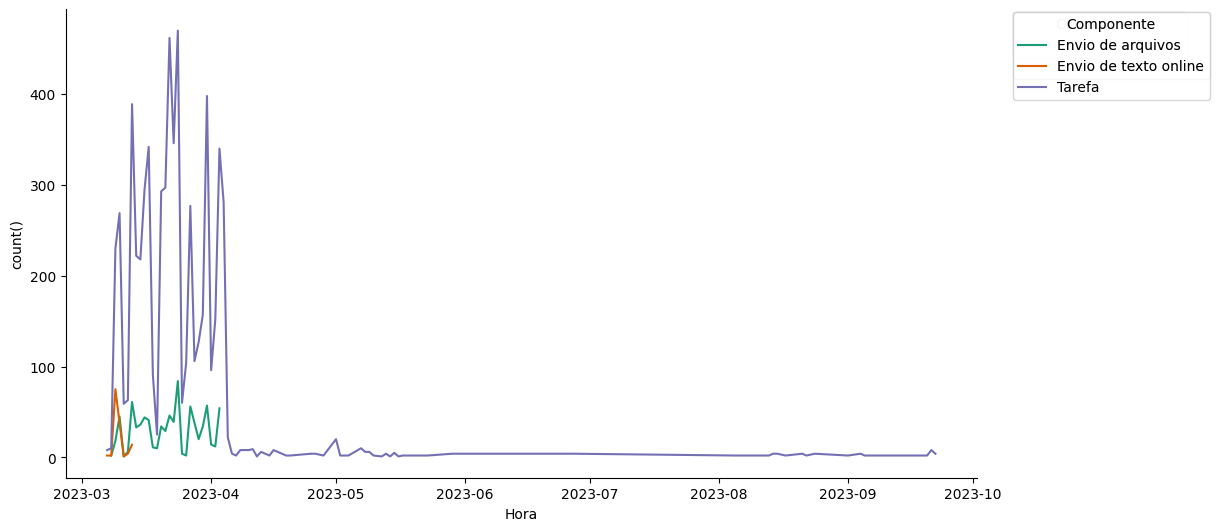

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Hora']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Hora'}, axis=1)
              .sort_values('Hora', ascending=True))
  xs = counted['Hora']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Hora', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Componente')):
  _plot_series(series, series_name, i)
  fig.legend(title='Componente', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hora')
_ = plt.ylabel('count()')

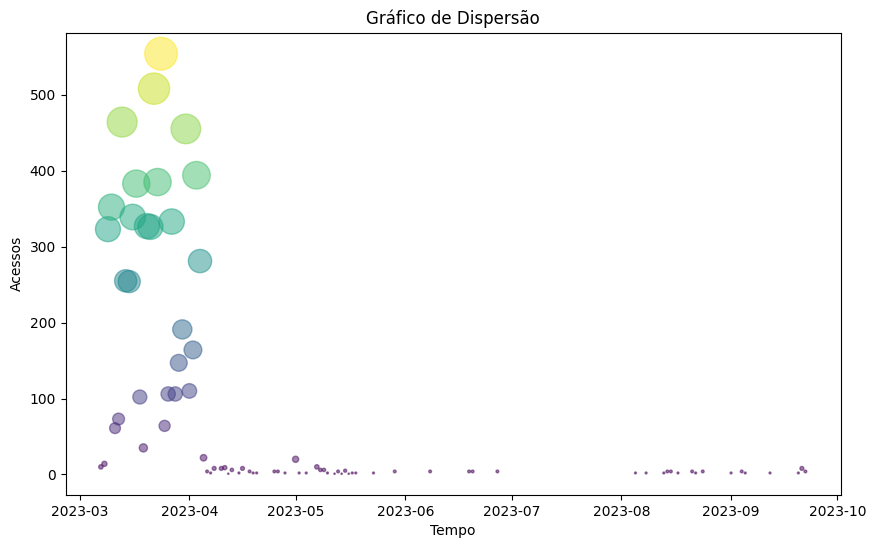

In [66]:
plt.figure(figsize=(10, 6))

plt.scatter(datas_unicas, acessos, s=acessos, c=acessos, alpha=0.5)

plt.title("Gráfico de Dispersão")
plt.xlabel("Tempo")
plt.ylabel("Acessos")

plt.show()

## Preenchimento de 'Vazios'

O dataset não tem valores faltantes no estilo NAN, por exemplo. Porém, é possível que existam alguns dias do período de coleta de dados em que ocorreram 0 interações. É importante adicionar esses dias com a contagem 0 para que, no momento da análise da série temporal, nosso modelo tenha exemplos de dias/períodos em que ocorreram 0 interações.

Então, aqui eu faria
- uma iteração por *todos os dias* que existem entre o primeiro dia de coleta e o último
- caso algum deles não esteja no conjunto de dados, eu adicionaria este dia com a contagem 0.

In [86]:
#Não há vazios, provar programaticamente aqui
df.fillna(value='', inplace=True)

## Criação de Janelas
- https://www.mlq.ai/time-series-tensorflow-windows-horizons/
- https://www.tensorflow.org/tutorials/structured_data/time_series?hl=pt-br#data_windowing

In [67]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [68]:
labels = df.columns
print(labels)

Index(['Hora', 'ID', 'Contexto do Evento', 'Componente', 'Nome do evento',
       'Descrição', 'Origem', 'endereço IP'],
      dtype='object')


In [69]:
w1 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=labels)
w1

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): Index(['Hora', 'ID', 'Contexto do Evento', 'Componente', 'Nome do evento',
       'Descrição', 'Origem', 'endereço IP'],
      dtype='object')

## Análise de Série Temporal

### Keras Tuner

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from kerastuner.tuners import RandomSearch
import keras_tuner
from sklearn.model_selection import train_test_split

In [75]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                           activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="softmax"))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


input_shape = len(df.columns)

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',  # problem
    max_trials=5,
    directory='my_tuner_directory',  # save results
    project_name='my_tuner_project'
)

Reloading Tuner from my_tuner_directory/my_tuner_project/tuner0.json


In [76]:
model_build = build_model(keras_tuner.HyperParameters())

In [77]:
print(model_build.__str__)

<method-wrapper '__str__' of Sequential object at 0x7f809dfecf70>


### Treinamento

In [88]:
# hyperparameters
tuner.search(x=train_df[:1468], y=val_df, epochs=5, validation_data=(train_df[:1468], val_df))

Traceback (most recent call last):
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/home/anthon/.local/lib/python3.10/site-pa

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/home/anthon/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/anthon/.local/lib/python3.10/site-packages/tensorflow/python/framework/constant_op.py", line 103, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
final_model = tuner.hypermodel.build(best_hps)

In [ ]:
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# Cell In[194], line 2
#       1 # hyperparameters
# ----> 2 tuner.search(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val))
#       3 best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
#       5 # Build final model

# File ~/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py:234, in BaseTuner.search(self, *fit_args, **fit_kwargs)
#     232     self.on_trial_begin(trial)
#     233     self._try_run_and_update_trial(trial, *fit_args, **fit_kwargs)
# --> 234     self.on_trial_end(trial)
#     235 self.on_search_end()

# File ~/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py:338, in BaseTuner.on_trial_end(self, trial)
#     332 def on_trial_end(self, trial):
#     333     """Called at the end of a trial.
#     334 
#     335     Args:
#     336         trial: A `Trial` instance.
#     337     """
# --> 338     self.oracle.end_trial(trial)
#     339     self.save()

# File ~/.local/lib/python3.10/site-packages/keras_tuner/src/engine/oracle.py:108, in synchronized.<locals>.wrapped_func(*args, **kwargs)
#     106     LOCKS[oracle].acquire()
#     107     THREADS[oracle] = thread_name
# --> 108 ret_val = func(*args, **kwargs)
#     109 if need_acquire:
#     110     THREADS[oracle] = None

# File ~/.local/lib/python3.10/site-packages/keras_tuner/src/engine/oracle.py:586, in Oracle.end_trial(self, trial)
#     584 if not self._retry(trial):
#     585     self.end_order.append(trial.trial_id)
# --> 586     self._check_consecutive_failures()
#     588 self._save_trial(trial)
#     589 self.save()

# File ~/.local/lib/python3.10/site-packages/keras_tuner/src/engine/oracle.py:543, in Oracle._check_consecutive_failures(self)
#     541     consecutive_failures = 0
#     542 if consecutive_failures == self.max_consecutive_failed_trials:
# --> 543     raise RuntimeError(
#     544         "Number of consecutive failures exceeded the limit "
#     545         f"of {self.max_consecutive_failed_trials}.\n"
#     546         + (trial.message or "")
#     547     )

# RuntimeError: Number of consecutive failures exceeded the limit of 3.
# Traceback (most recent call last):
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
#     self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
#     results = self.run_trial(trial, *fit_args, **fit_kwargs)
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
#     obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
#     results = self.hypermodel.fit(hp, model, *args, **kwargs)
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
#     return model.fit(*args, **kwargs)
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
#     raise e.with_traceback(filtered_tb) from None
#   File "/home/anthon/.local/lib/python3.10/site-packages/keras/src/engine/data_adapter.py", line 1105, in select_data_adapter
#     raise ValueError(
# ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.indexes.base.Index'>


In [ ]:
#Treinamento de modelo

# Train the final model
final_model.fit(train_features, train_labels, epochs=10, validation_data=(val_features, val_labels))